In [1]:
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plot

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
data = pd.read_csv("output.csv")
cleaned_data = pd.read_csv("cleaned.csv")
pd.set_option('display.max_rows', None)

In [2]:
def build_wordcloud(data):
    
    wordcloud = WordCloud(
      background_color='white',
      stopwords=stopwords,
      max_words=800,
      max_font_size=800, 
      width = 800, height = 800,
      random_state=0
     ).generate(str(data))

    plot.figure(figsize = (12,15), facecolor = None) 
    plot.imshow(wordcloud) 
    plot.axis("off") 
    plot.tight_layout(pad = 0) 

    plot.show() 
    
def return_data_by_author(data, author):
    return data.loc[data['author'] == author]

In [3]:
count = len(cleaned_data)
print count

6540


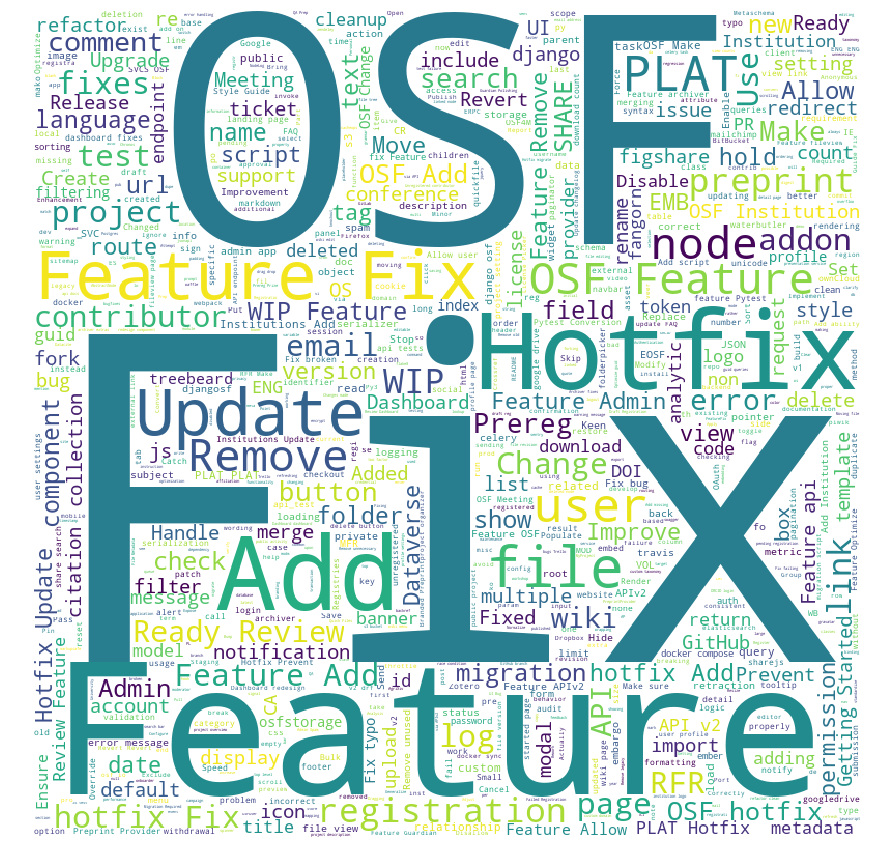

In [3]:
build_wordcloud(data['title'])

In [5]:
df = cleaned_data.set_index(pd.DatetimeIndex(cleaned_data['created']))

prs_2014 = df[(df.index > '2014-01-01') & (df.index <= '2014-12-31')]
prs_2015 = df[(df.index > '2015-01-01') & (df.index <= '2015-12-31')]
prs_2016 = df[(df.index > '2016-01-01') & (df.index <= '2016-12-31')]
prs_2017 = df[(df.index > '2017-01-01') & (df.index <= '2017-12-31')]
prs_2018 = df[(df.index > '2018-01-01') & (df.index <= '2018-12-31')]
prs_2019 = df[(df.index > '2019-01-01') & (df.index <= '2019-12-31')]

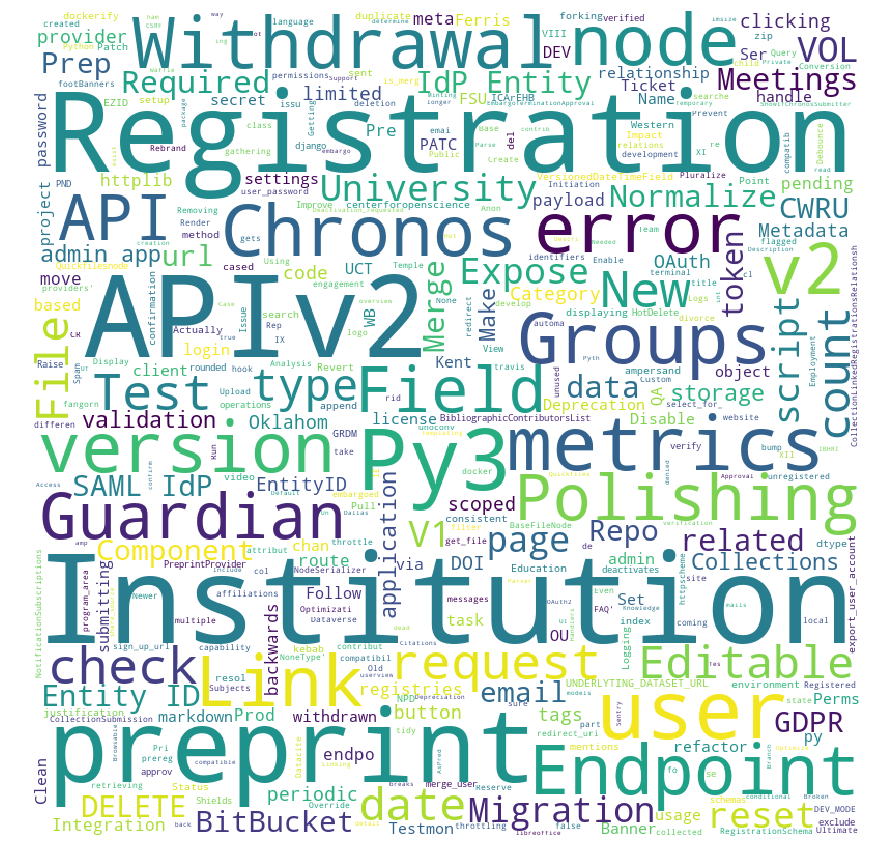

In [6]:
build_wordcloud(prs_2019['title'])

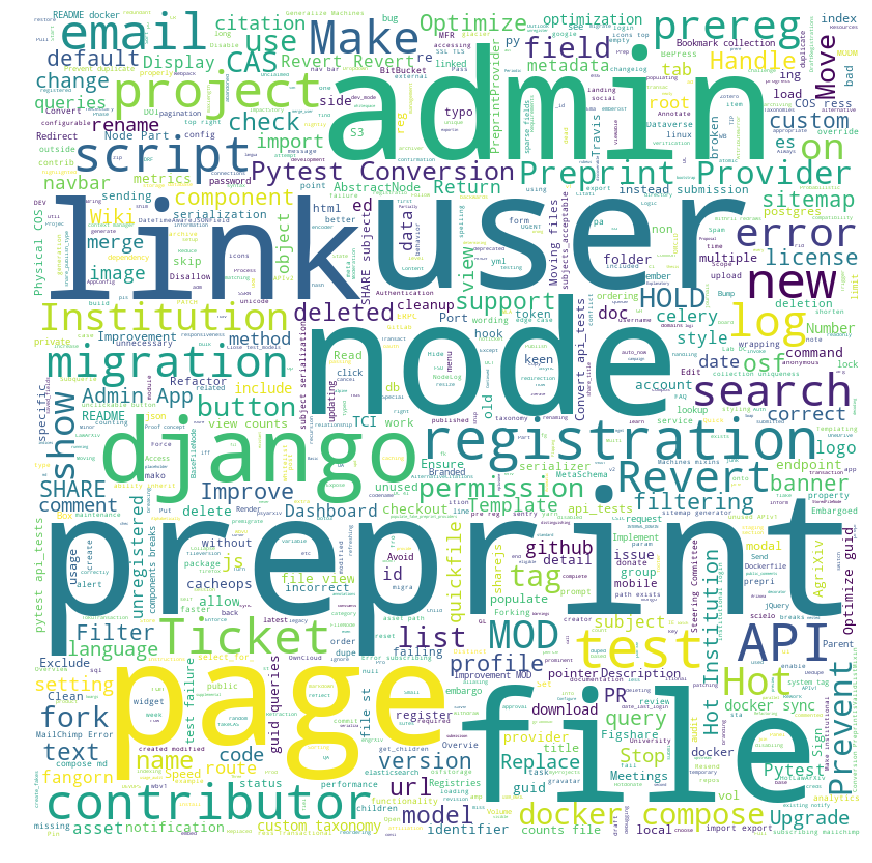

In [7]:
build_wordcloud(prs_2017['title'])

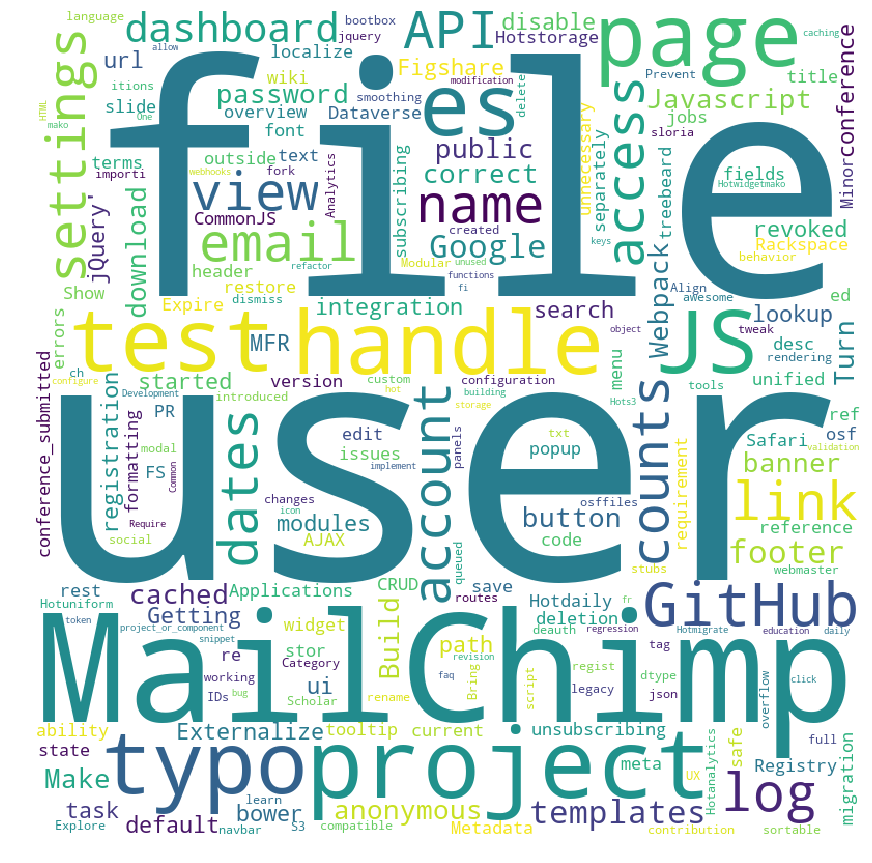

In [8]:
build_wordcloud(prs_2014['title'])

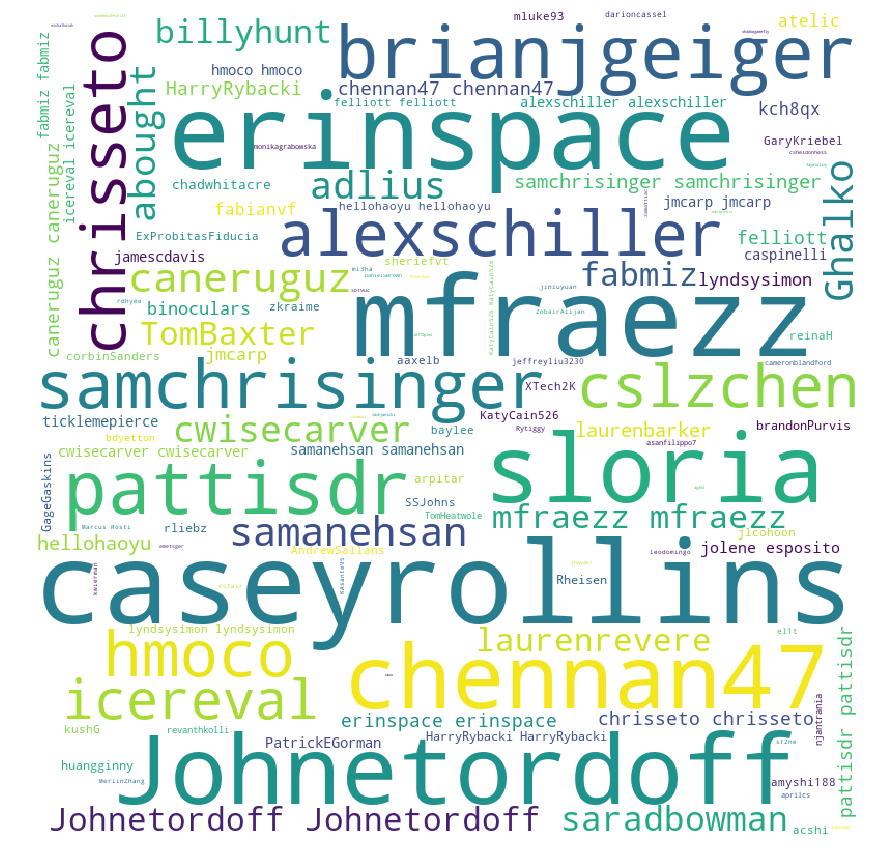

In [9]:
build_wordcloud(data['author'])

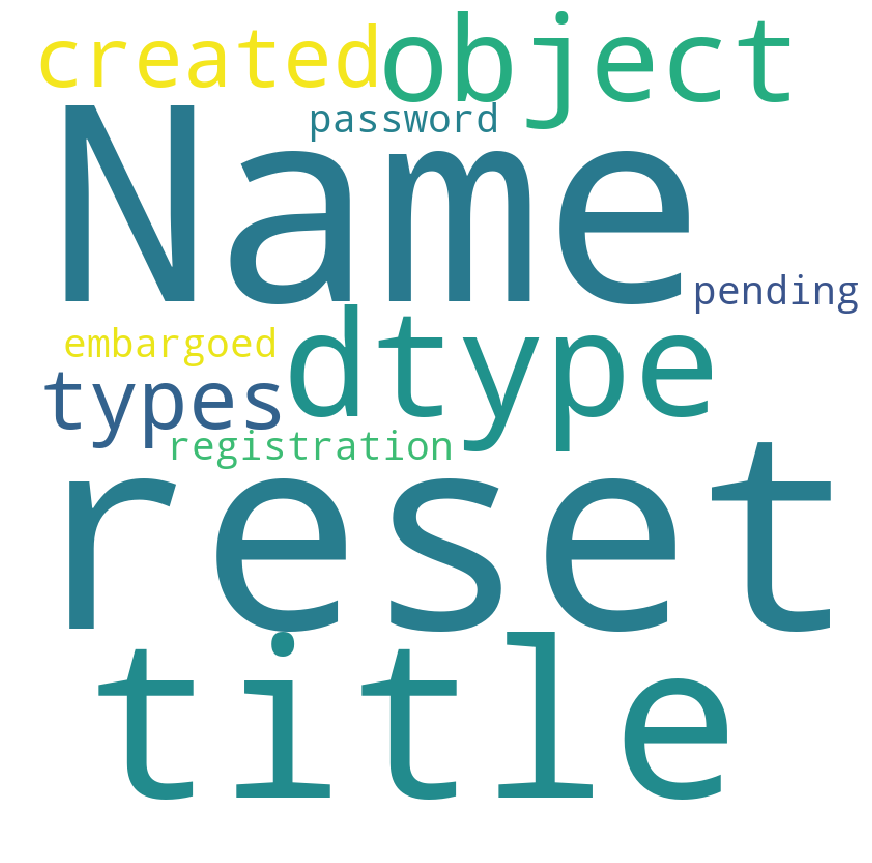

In [16]:
by_author = return_data_by_author(prs_2019, 'pattisdr')
build_wordcloud(by_author['title'])